In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [27]:
def plot_sentiment_vs_stock(sentiments_csv, start_date, end_date, output):
    """
    Loads a dataset of news article sentiments (with 'date' and 'sentiment' columns), aggregates daily average sentiment,
    fetches NVDA stock price data, and plots both on a dual-axis graph.

    Args:
        sentiments_csv (str): Path to the CSV file with columns: date, sentiment.
        start_date (str): Start date in format 'YYYY-MM-DD'.
        end_date (str): End date in format 'YYYY-MM-DD'.
    """
    # Load the sentiment dataset and convert 'date' to datetime
    df = pd.read_csv(sentiments_csv)
    
    #Format dates to YYYY-MM-DD
    df['date'] = df['date'].str[:10]
    
    # Convert 'date' column to datetime; errors='coerce' will handle non-parsable entries
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    #Take relevant date period
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Map sentiment labels to numeric scores (adjust mapping as needed)
    sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
    df['sentiment_score'] = df['sentiments'].map(sentiment_map)
    
    # Group by date; calculate average sentiment score per day
    daily_sentiment = df.groupby(df['date'].dt.date)['sentiment_score'].mean()
    daily_sentiment = daily_sentiment.sort_index()
    
    # Fetch NVDA stock price data using yfinance
    stock = yf.Ticker("NVDA")
    stock_df = stock.history(start=start_date, end=end_date)
    daily_stock_price = stock_df['Close']
    
    # Create dual-axis plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot stock price
    ax1.plot(daily_stock_price.index, daily_stock_price, color='blue', label='NVDA Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a second y-axis for average sentiment
    ax2 = ax1.twinx()
    # Convert daily_sentiment index (date) to datetime for correct plotting
    sentiment_dates = pd.to_datetime(daily_sentiment.index)
    ax2.plot(sentiment_dates, daily_sentiment, color='red', label='Avg Sentiment Score', marker='o', linewidth=1, alpha=0.5)
    ax2.set_ylabel("Avg Sentiment Score", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Title & Legends
    plt.title("NVDA Stock Price vs Daily News Sentiment")
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.grid(True)
    plt.savefig(output, dpi=300)
    plt.show()

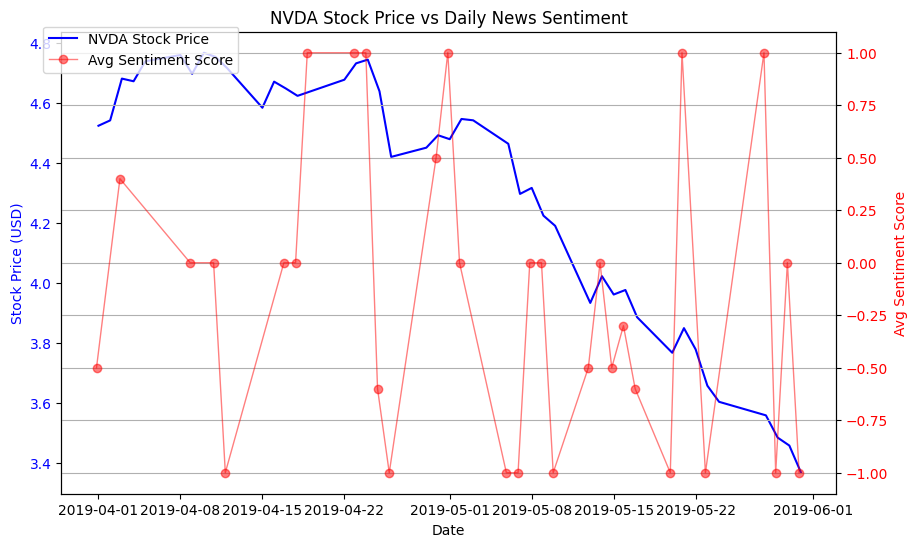

In [29]:
plot_sentiment_vs_stock("~/projects/NVDA_stock_prediction/Data/Outputs/raw_analyst_ratings_sentiment.csv", '2019-04-01', '2019-06-01', "./Figures/News_and_Stock_Prices_2019-04_to_2019_06.png")